In [2]:
import os
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import numpy as np


In [3]:
count_zero = 0
count_one = 0
data="/home/patel_zeel/kilns_neurips24/corrected_txt_obb/uttar_pradesh/"
for filename in os.listdir(data):
    if filename.endswith('.txt'):
        with open(data+filename,'r') as f:
            for line in f:
                values = line.split()
                if values[0] == '0.000000':
                    count_zero += 1
                elif values[0] == '1.000000':
                    count_one += 1
                else:
                    print("Error")

print("Count of 0: ", count_zero)

print("Count of 1: ", count_one)


Count of 0:  8053
Count of 1:  5826


<Axes: >

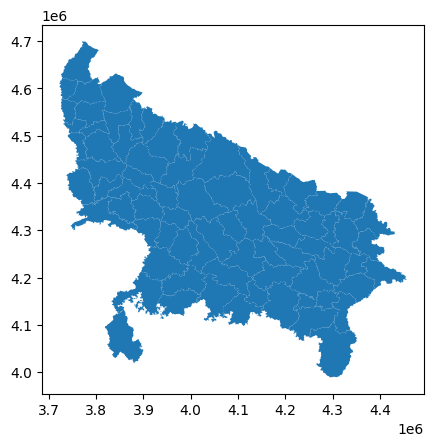

In [4]:
shape_file = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/shapefiles/india_districtwise_shapefile_2022/DISTRICT_BOUNDARY.shp"
shape = gpd.read_file(shape_file)
# select only state of Uttar Pradesh
shape = shape[shape['STATE'] == 'UTTAR PRADESH']
# print(shape.tail())
# print(shape.shape)
#visualize the shapefile
shape.plot()

In [5]:
#print the column names
print(shape.columns)
#print Districts of Uttar Pradesh
# print(shape['District'])
shape['District'] = shape['District'].str.replace('>', 'A')
shape['District'] = shape['District'].str.replace('|', 'I')

# print(shape['District'])
#print all unique districts
print(shape['District'].unique())

Index(['District', 'STATE', 'REMARKS', 'State_LGD', 'DISTRICT_L', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')
['AGRA' 'ALIGARH' 'AMBEDKARNAGAR' 'AMETHI' 'AMROHA' 'AURAIYA' 'AZAMGARH'
 'BUDAUN' 'BAGHPAT' 'BAHRAICH' 'BALLIA' 'BALRAMPUR' 'BANDA' 'BARABANKI'
 'BAREILLY' 'BASTI' 'BHADOHI' 'BIJNOR' 'BULANDSHAHR' 'CHANDAULI'
 'CHITRAKOOT' 'DEORIA' 'AYODHYA' 'ETAH' 'ETAWAH' 'FARRUKHABAD' 'FATEHPUR'
 'FIROZABAD' 'GAUTAMBUDHNAGAR' 'GAZIPUR' 'GHAZIABAD' 'GONDA' 'GORAKHPUR'
 'HAMIRPUR' 'HAPUR' 'HARDOI' 'HATHRAS' 'JALAUN' 'JAUNPUR' 'JHANSI'
 'KANNAUJ' 'KANPUR' 'KANPUR DEHAT' 'KASGANJ' 'KAUSHAMBI' 'KHERI'
 'KUSHINAGAR' 'LALITPUR' 'LUCKNOW' 'MAHOBA' 'MAINPURI' 'MATHURA' 'MAU'
 'MEERUT' 'MIRZAPUR' 'MORADABAD' 'MUZAFFARNAGAR' 'PILIBHIT' 'PRATAPGARH'
 'RAIBEARELI' 'RAMPUR' 'SAHARANPUR' 'SAMBHAL' 'SANTKABIRNAGAR'
 'SHAHJAHANPUR' 'SHAMLI' 'SHRAWASTI' 'SIDDHARTHNAGAR' 'SITAPUR'
 'SONBHADRA' 'SULTANPUR' 'UNNAO' 'VARANASI' 'PRAYAGRAJ' 'MAHARAJGANJ']


    District          STATE REMARKS  State_LGD DISTRICT_L    Shape_Leng  \
235  LUCKNOW  UTTAR PRADESH    None          9        162  370767.28997   

       Shape_Area                                           geometry  
235  2.438586e+09  POLYGON ((4090619.487 4343438.173, 4090759.189...  


[]

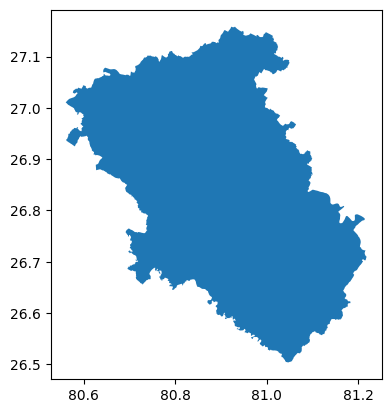

In [6]:
#plot the district == PRAYAGRAJ
praygraj=shape[shape['District'] == 'LUCKNOW']
print(praygraj)
praygraj=praygraj.to_crs(epsg=4326).plot()
praygraj.plot()

In [7]:
prayagraj_data = shape[shape['District'] == 'PRAYAGRAJ']
prayagraj_data=prayagraj_data.to_crs(epsg=4326)
# Ensure 'geometry' column exists in prayagraj_data for spatial queries
prayagraj_geom = prayagraj_data['geometry'].iloc[0]  # Get the geometry of PRAYAGRAJ district
# print(prayagraj_geom)
count_inside=0
txt_files = [f for f in os.listdir(data) if f.endswith('.txt')]
for file in txt_files:
    try:
        # (e.g., "22.15,85.49.txt")
        lat, lon = map(float, file.replace('.txt', '').split(','))
        # Create a Shapely Point for the lat-lon pair
        point = Point(lon, lat)  # Shapely uses (lon, lat) format
        if prayagraj_geom.contains(point):
            # print(f"Lat: {lat}, Lon: {lon} in file '{file}' is inside PRAYAGRAJ district.")
            count_inside+=1
        # else:
            # print(f"Lat: {lat}, Lon: {lon} in file '{file}' is outside PRAYAGRAJ district.")
    except ValueError:
        print(f"Skipping file '{file}' due to incorrect lat-lon format.")

print(f"Total count of points inside PRAYAGRAJ district: {count_inside}")


Total count of points inside PRAYAGRAJ district: 292


In [8]:
# import os

# # Path to your image and label data
# image_data = "/mnt/dataset/brick_kilns/raw_data/uttar_pradesh/"
# processed_data_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/up_10803_v1/images"

# # Ensure the processed data directory exists
# os.makedirs(processed_data_dir, exist_ok=True)

# # List all .txt files in the directory
# txt_files = [f for f in os.listdir(data) if f.endswith('.txt')]

# count_image = 0
# # Iterate over the .txt files
# for file in txt_files:
#     # Extract lat and lon from the .txt file name (e.g., "22.15,85.49.txt")
#     lat, lon = map(float, file.replace('.txt', '').split(','))
        
#     # Construct the corresponding .png image file name
#     base_filename = file.replace('.txt', '')
#     image_file = os.path.join(image_data, base_filename + '.png')
    
#     # Check if the corresponding .png image file exists
#     if os.path.exists(image_file):
#         count_image += 1
#         symlink_path = os.path.join(processed_data_dir, base_filename + '.png')

#         # Create a symlink to the image file
#         try:
#             os.symlink(image_file, symlink_path)
#             print(f"Symlink created: {symlink_path} -> {image_file}")
#         except FileExistsError:
#             print(f"Symlink already exists: {symlink_path}")
            
# print(f"Total count of image files: {count_image}")

In [9]:
import os
from tqdm import tqdm

# Path to your image and label data
image_data = "/mnt/dataset/brick_kilns/raw_data/uttar_pradesh/"
processed_data_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/images"
# print(os.listdir(image_data))
txt_files = [f for f in os.listdir(data) if f.endswith('.txt')]
count_image = 0
# Iterate over the .txt files
for file in tqdm(txt_files, desc="Processing files", unit="file"):
    # Extract lat and lon from the .txt file name (e.g., "22.15,85.49.txt")
    lat, lon = map(float, file.replace('.txt', '').split(','))
        
    base_filename = file.replace('.txt', '')
    # print(base_filename)
    image_file = os.path.join(image_data, base_filename + '.png')
    # print(image_file)
    if os.path.exists(image_file):
        count_image+=1
        os.system(f"cp {image_file} {processed_data_dir}")      
print(f"Total count of image files: {count_image}")

        

Processing files:   0%|          | 0/10901 [00:00<?, ?file/s]

Processing files: 100%|██████████| 10901/10901 [09:46<00:00, 18.60file/s]

Total count of image files: 10802
